In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('medical_students_dataset.csv')
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


## **2. Missing Value**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [4]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


In [5]:
df.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [6]:
df['Gender'].describe()
df['Blood Type'].describe()
df['Diabetes'].describe()
df['Smoking'].describe()

,Smoking
count,180000
unique,2
top,No
freq,143971


In [7]:
# Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-7-da1a6285f769>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-7-da1a6285f769>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [8]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      200000 non-null  float64
 1   Age             200000 non-null  float64
 2   Gender          200000 non-null  object 
 3   Height          200000 non-null  float64
 4   Weight          200000 non-null  float64
 5   Blood Type      200000 non-null  object 
 6   BMI             200000 non-null  float64
 7   Temperature     200000 non-null  float64
 8   Heart Rate      200000 non-null  float64
 9   Blood Pressure  200000 non-null  float64
 10  Cholesterol     200000 non-null  float64
 11  Diabetes        200000 non-null  object 
 12  Smoking         200000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [10]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 12572


In [11]:
# Handling duplicate
df = df.drop_duplicates()

In [12]:
# Mengecek duplicate setelah di-handle
handle_duplicate = df.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


In [13]:
# Fungsi untuk menghapus outlier dari semua kolom numerik menggunakan metode IQR
def remove_outliers_iqr(df):
    df_cleaned = df.copy()  # Hindari mengubah df asli
    numeric_cols = df_cleaned.select_dtypes(include='number').columns.tolist()

    print("Outlier removal using IQR method:")
    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before = df_cleaned.shape[0]
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        after = df_cleaned.shape[0]

        print(f"  - Kolom '{col}': {before - after} baris dihapus")

    return df_cleaned

# Terapkan pada DataFrame (misalnya: df)
df = remove_outliers_iqr(df)

Outlier removal using IQR method:
  - Kolom 'Student ID': 0 baris dihapus
  - Kolom 'Age': 0 baris dihapus
  - Kolom 'Height': 0 baris dihapus
  - Kolom 'Weight': 0 baris dihapus
  - Kolom 'BMI': 1865 baris dihapus
  - Kolom 'Temperature': 3126 baris dihapus
  - Kolom 'Heart Rate': 0 baris dihapus
  - Kolom 'Blood Pressure': 0 baris dihapus
  - Kolom 'Cholesterol': 0 baris dihapus


In [14]:
# Encoding data kategorik (One-Hot Encoding)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Kolom kategorik:", categorical_cols)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Ukuran dataframe setelah encoding:", df_encoded.shape)
df_encoded.head()

Kolom kategorik: ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
Ukuran dataframe setelah encoding: (182437, 15)


,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender_Male,Blood Type_AB,Blood Type_B,Blood Type_O,Diabetes_Yes,Smoking_Yes
0,1.000000,18.000000,161.777924,72.354947,27.645835,98.600948,95.0,109.000000,203.0,False,False,False,True,False,False
1,2.000000,26.021561,152.069157,47.630941,23.338869,98.714977,93.0,104.000000,163.0,True,False,True,False,False,False
2,3.000000,32.000000,182.537664,55.741083,16.729017,98.260293,76.0,130.000000,216.0,False,False,False,False,True,False
3,49974.042078,30.000000,182.112867,63.332207,19.096042,98.839605,99.0,112.000000,141.0,True,False,True,False,False,True
4,5.000000,23.000000,174.947103,46.234173,23.338869,98.480008,95.0,114.558033,231.0,False,False,False,True,False,False


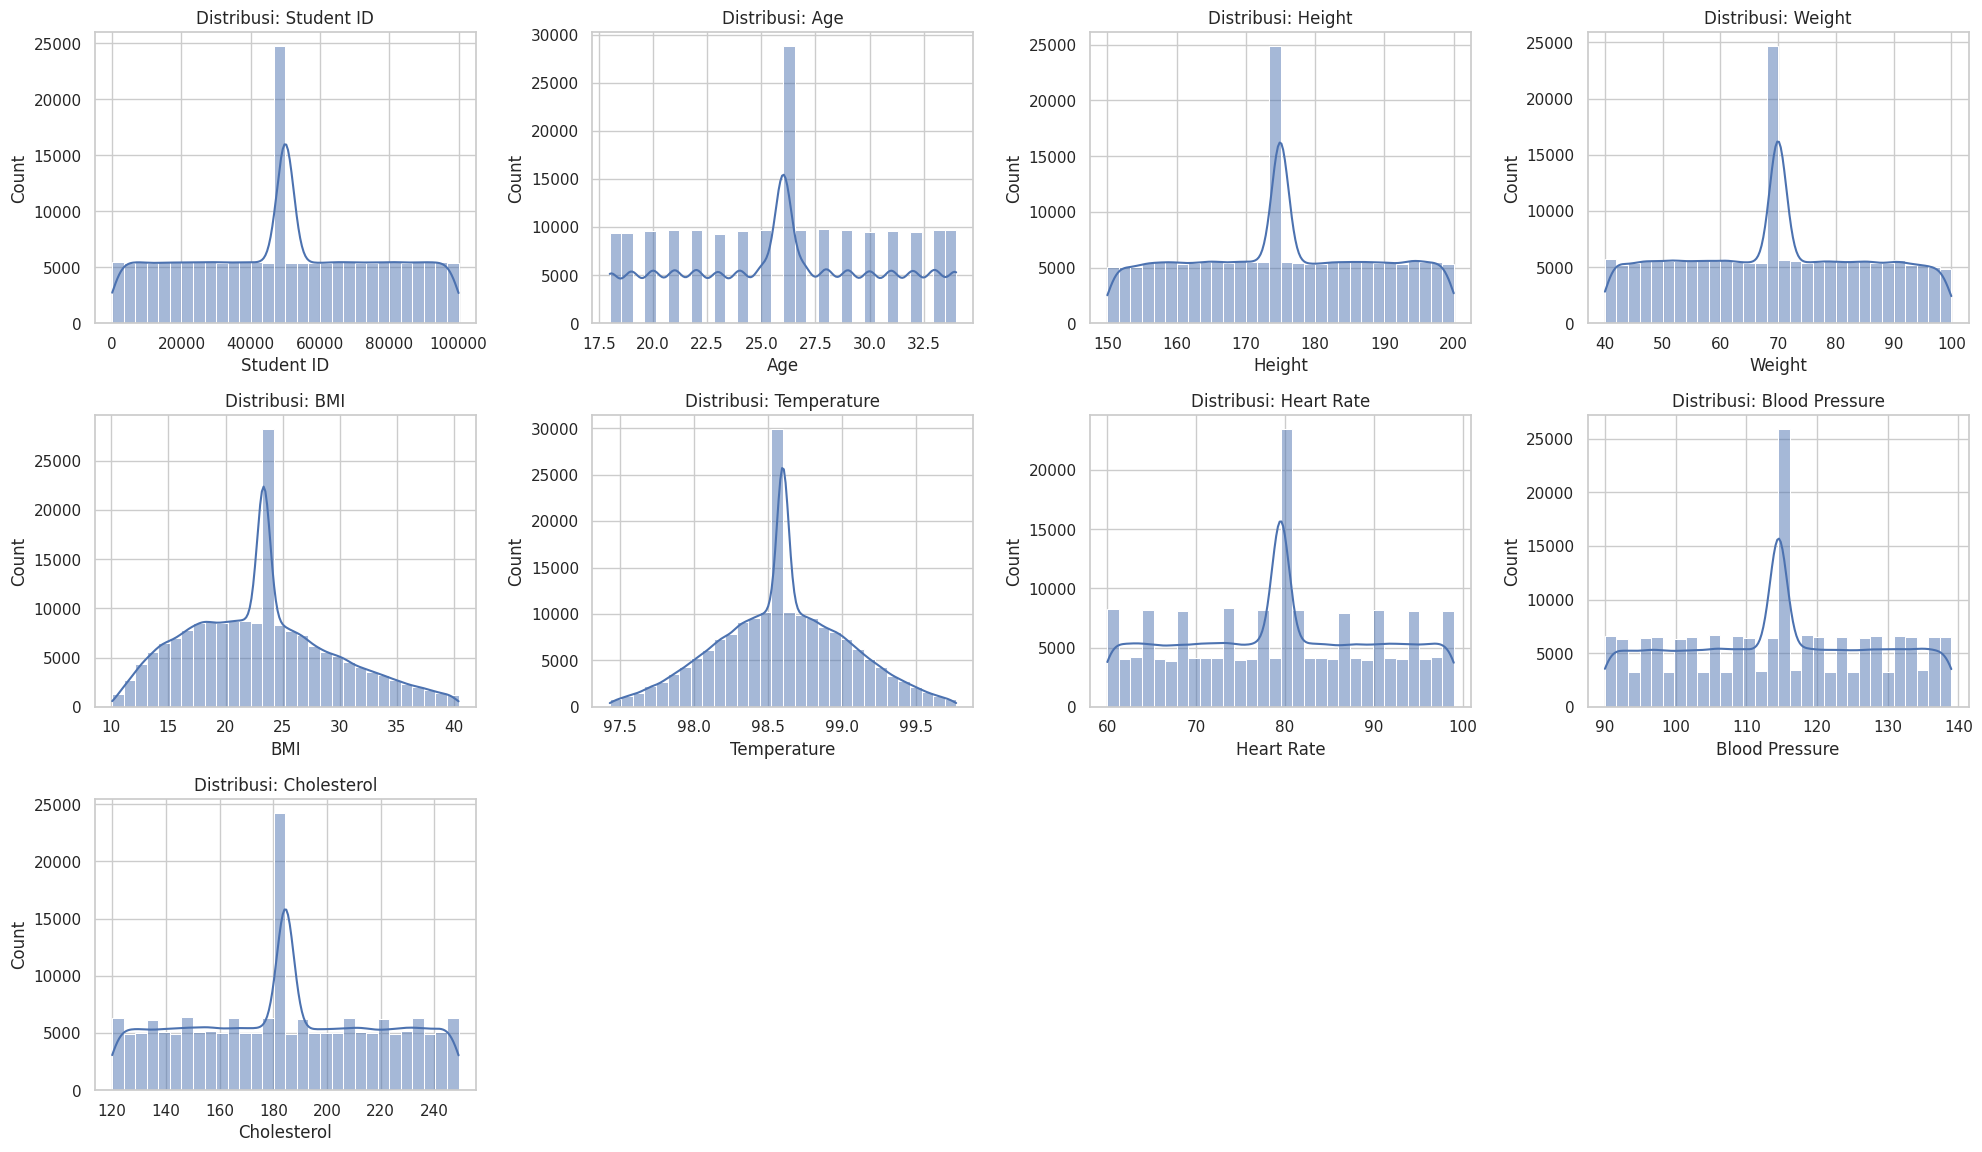

In [15]:
# Visualisasi distribusi data numerik
sns.set(style="whitegrid")
numeric_cols = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()


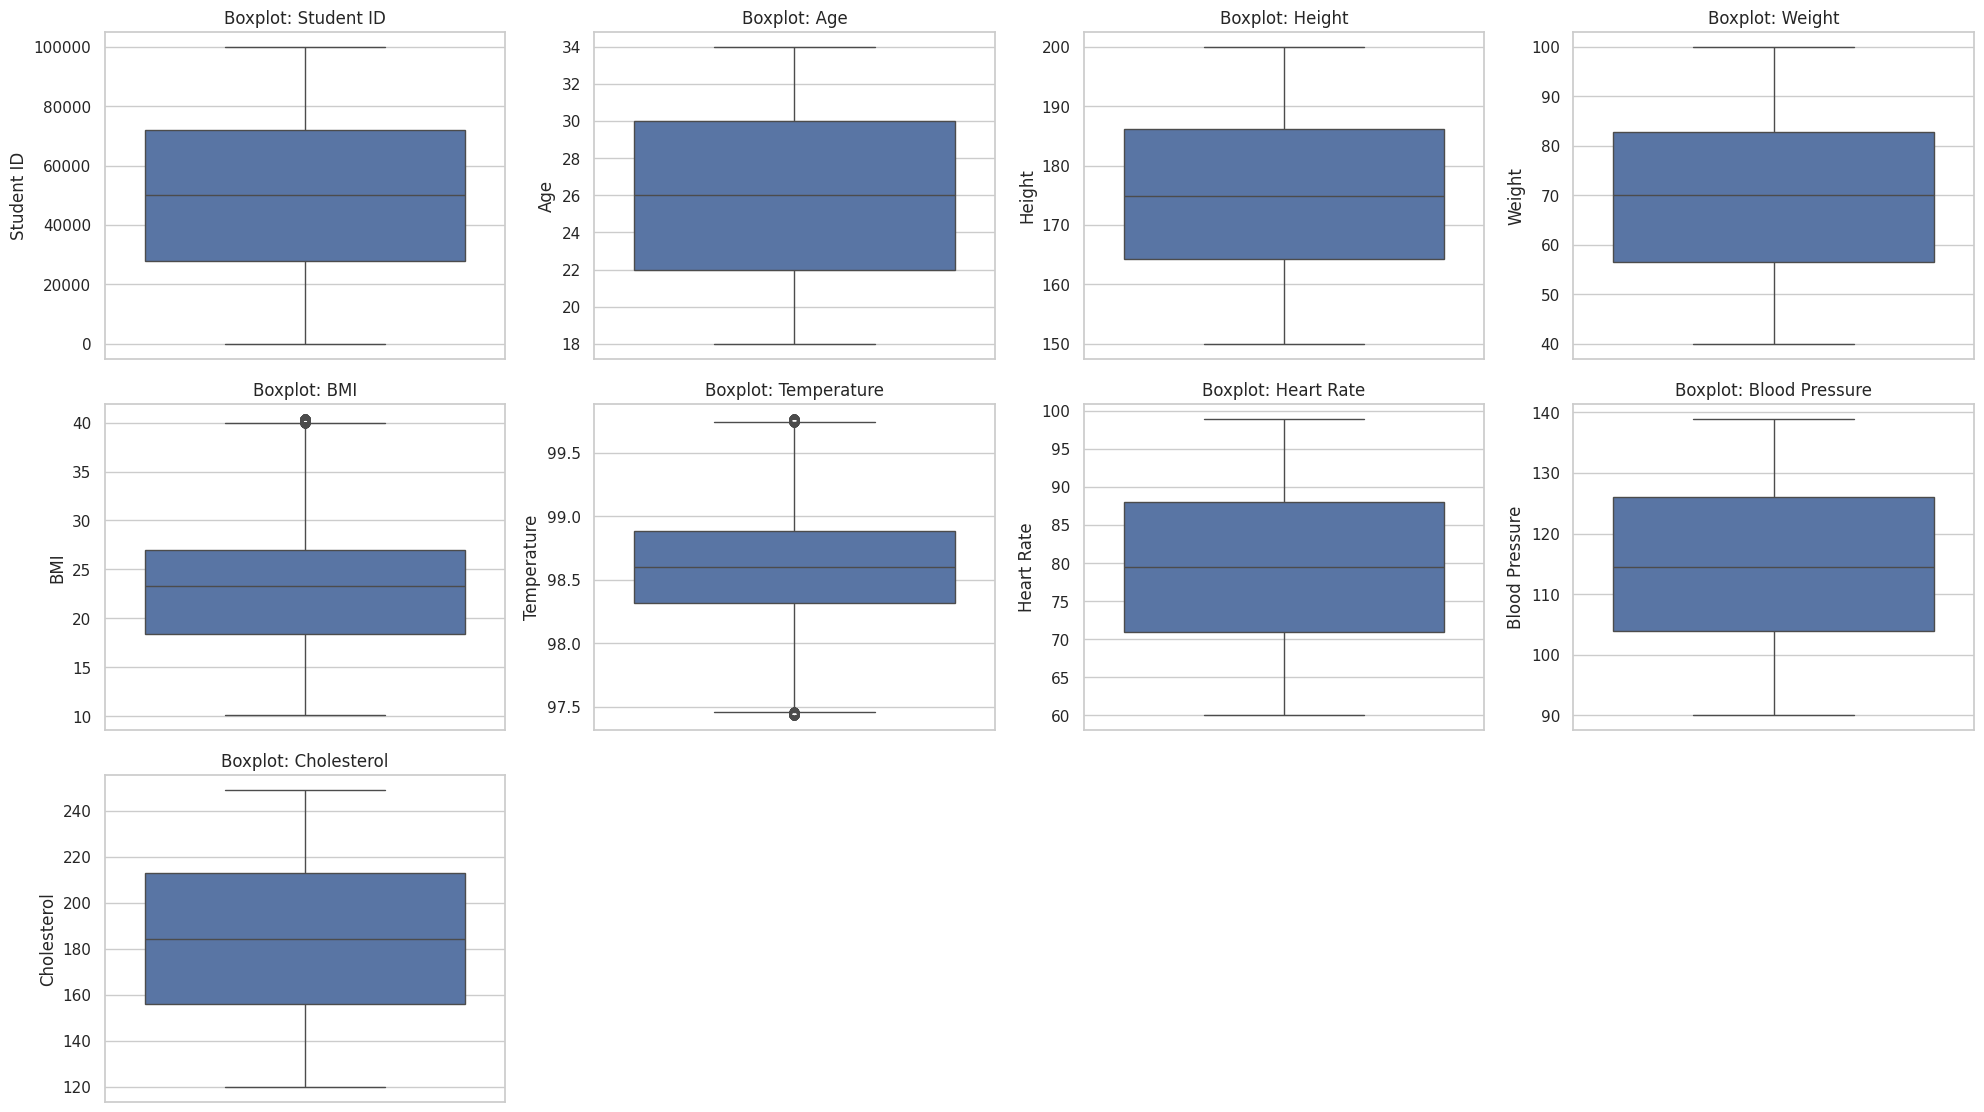

In [16]:
# Boxplot kolom numerik untuk mendeteksi outlier
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

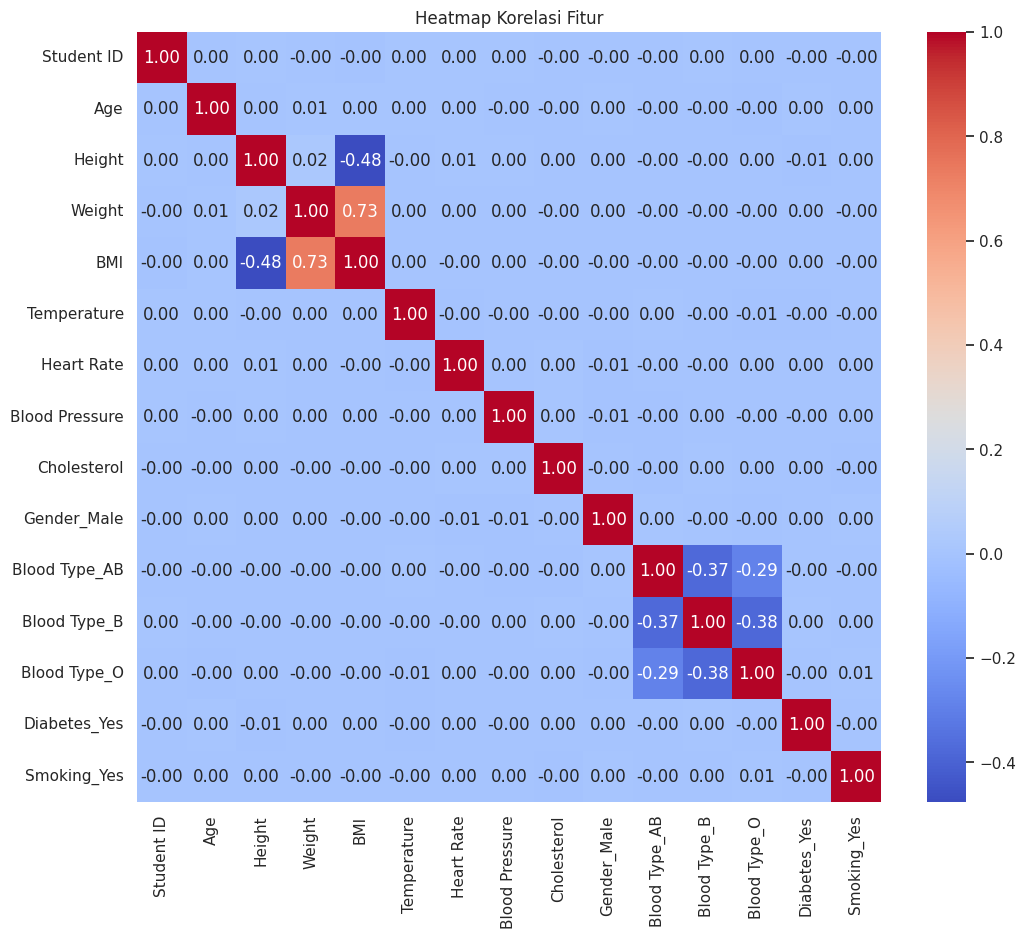

In [17]:
# Visualisasi korelasi antar fitur menggunakan heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()